In [1]:
import kagglehub
import multiprocessing
import torch

# Download latest version
path = kagglehub.dataset_download("lokisilvres/dental-disease-panoramic-detection-dataset")

print("Path to dataset files:", path)

from ultralytics import YOLO

#===== Loading a model =====
pt_file = r"/home/maciej/code/Wikar235/x-ray-disease/temp/trained_model.pt"  # update to your actual path
model = YOLO(pt_file)
model.info()

#===== Prediction =====
test_image = path + "/YOLO/YOLO/test/images/793a4e03-Delshad_sani_Shahla_55yo_28092020_153551_jpg.rf.db86c8463611446aa8f74f238be6e3ab.jpg"
results = model.predict(test_image)


/home/maciej/.pyenv/versions/x-ray-disease/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/maciej/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6
YOLO11n-seg summary: 203 layers, 2,848,653 parameters, 0 gradients, 9.8 GFLOPs

image 1/1 /home/maciej/.cache/kagglehub/datasets/lokisilvres/dental-disease-panoramic-detection-dataset/versions/6/YOLO/YOLO/test/images/793a4e03-Delshad_sani_Shahla_55yo_28092020_153551_jpg.rf.db86c8463611446aa8f74f238be6e3ab.jpg: 416x416 5 Crowns, 5 Fillings, 2 Implants, 1 Missing teeth, 1 Root Canal Treatment, 199.1ms
Speed: 22.2ms preprocess, 199.1ms inference, 33.0ms postprocess per image at shape (1, 3, 416, 416)


In [46]:
boxes = results[0].boxes.xyxy

cls = results[0].boxes.cls
masks = results[0].masks
obb = results[0].obb
print(obb)

None


In [51]:
results[0].show()

In [25]:
len(boxes)

14

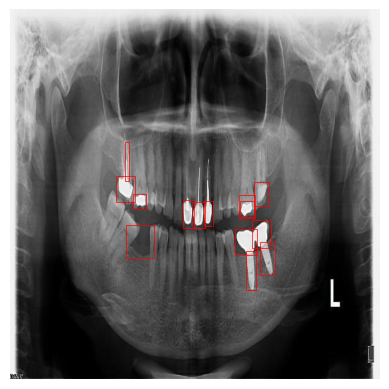

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(test_image)
boxes = results[0].boxes.xyxy.cpu().numpy()  # convert to numpy array

plt.imshow(img)
ax = plt.gca()

for box in boxes:
    x1, y1, x2, y2 = box[:4]
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=0.5)
    ax.add_patch(rect)

plt.axis('off')
plt.show()

[[     433.85      403.08]
 [     433.85      441.54]
 [     438.46      441.54]
 [     441.54      444.62]
 [     441.54      450.77]
 [     443.08      452.31]
 [     443.08      453.85]
 [     447.69      458.46]
 [     447.69      463.08]
 [     455.38      463.08]
 [     455.38      444.62]
 [     453.85      443.08]
 [     453.85      433.85]
 [     452.31      432.31]
 [     452.31      427.69]
 [     450.77      426.15]
 [     450.77      423.08]
 [     449.23      421.54]
 [     449.23      416.92]
 [     447.69      415.38]
 [     447.69      410.77]
 [     446.15      409.23]
 [     446.15      403.08]]
[[     335.38      329.23]
 [     335.38      376.92]
 [     352.31      376.92]
 [     352.31      329.23]]
[[     316.92      329.23]
 [     316.92      383.08]
 [     330.77      383.08]
 [     330.77      378.46]
 [     332.31      376.92]
 [     332.31      372.31]
 [     333.85      370.77]
 [     332.31      369.23]
 [     332.31      363.08]
 [     333.85      361.54]

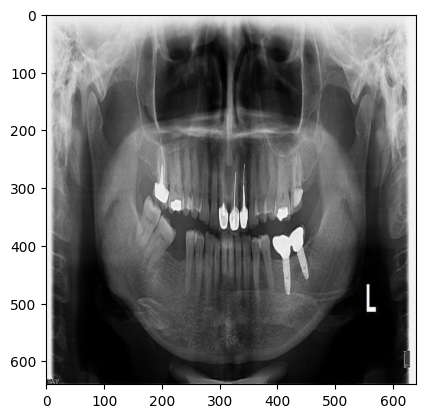

In [52]:
masks_coordinates = masks.xy

plt.imshow(img)
ax = plt.gca()

for mask in masks_coordinates:
    print(mask)
#     x = mask[:, 0]
#     y = mask[:, 1]
#     ax.plot(x, y, color='lime', linewidth=1)  # Draw mask outline

# plt.axis('off')
# plt.show()